# Loading Multimodal Data

In [3]:
!cp /content/drive/MyDrive/Multimodal/load_multimodal_tabular_data.py .
!cp /content/drive/MyDrive/Multimodal/layer_utils.py .
!cp /content/drive/MyDrive/Multimodal/tabular_combiner.py .
!cp /content/drive/MyDrive/Multimodal/tabular_modeling_auto.py .
!cp /content/drive/MyDrive/Multimodal/tabular_transformers.py .

In [4]:
!pip install transformers==3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 884 kB 29.6 MB/s 
     |████████████████████████████████| 1.3 MB 58.3 MB/s 
     |████████████████████████████████| 3.0 MB 60.1 MB/s 
     |████████████████████████████████| 880 kB 62.5 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=404daf88b1a4ccfd9b2b8a30e03251f736d40653b111789c1e4b0d0d94f00471
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [7]:
import pandas as pd
import numpy as np
import random
import load_multimodal_tabular_data


In [ ]:
list(data_df.select_dtypes(include=np.number))

['mri_order',
 'age',
 'who_functional_class',
 'survival_time',
 'death_1y',
 'overall_death',
 'survival_iloprost_time',
 'death_iloprost_1y',
 'heart_rate_rhc',
 'walking_distance',
 'reveal_score',
 'heart_rate',
 'bsa',
 'lvedv',
 'lvedv_index',
 'lvesv',
 'lvesv_index',
 'lvsv',
 'lvsv_index',
 'lvco',
 'lvef',
 'lv_dia_mass',
 'lv_mass_index',
 'rvedv',
 'rvesv',
 'rvsv',
 'rvedv_index',
 'rvesv_index',
 'rvsv_index',
 'rvco',
 'rvef',
 'auto_lv_edv_index',
 'lv_edv',
 'auto_lv_esv_index',
 'lv_esv',
 'auto_lv_sv_index',
 'lv_sv',
 'auto_lv_co',
 'lv_ef',
 'auto_lv_mass_index',
 'lv_edm',
 'lv_esm',
 'auto_vmi',
 'auto_rv_edv_index',
 'rv_edv',
 'auto_rv_esv_index',
 'rv_esv',
 'auto_rv_sv_index',
 'rv_sv',
 'auto_rv_co',
 'rv_ef',
 'auto_rv_mass_index',
 'rv_edm',
 'rv_esm',
 'auto_percent_pred_rvesvi',
 'auto_percent_pred_rvedvi',
 'auto_percent_pred_rvef',
 'auto_percent_pred_rvsvi',
 'auto_percent_pred_rvedmi',
 'auto_percent_pred_lvesvi',
 'auto_percent_pred_lvedvi',
 'auto

# Load multimodal tabular data

In [39]:
import pandas as pd
from transformers import AutoTokenizer,  set_seed
from load_multimodal_tabular_data import load_data_into_folds
set_seed(1234)
text_cols = ["E/e' average",'Machine (old)', 'Reported by 1',
       'Reporting Doctor', 'Summary', 'Conclusion', 'Scanned by 1','Machine','Scanned by 2']


label_col = 'death_1y' 
categorical_cols = ['baseline_prevalent','sex','ethnicity','pah_subcategory','final_primary_ph_diagnosis','final_primary_diagnosis_subcategory','pericardial_effusion',
                    'LV function', 'RV function', 'LA appearance',
       'RA dilated?', 'RA pressure range', 'Mitral regurgitation',
       'Tricuspid regurgitation', 'If PR, specify', 'Aortic regurgitation','death_iloprost_1y','mri_order','who_functional_class']
numerical_cols = [
 'heart_rate_rhc',
 'heart_rate',
 'bsa',
 'lvedv',
 'lvedv_index',
 'lvesv',
 'lvesv_index',
 'lvsv',
 'lvsv_index',
 'lvco',
 'lvef',
 'lv_dia_mass',
 'lv_mass_index',
 'rvedv',
 'rvesv',
 'rvsv',
 'rvedv_index',
 'rvesv_index',
 'rvsv_index',
 'rvco',
 'rvef',
 'auto_lv_edv_index',
 'lv_edv',
 'auto_lv_esv_index',
 'lv_esv',
 'auto_lv_sv_index',
 'lv_sv',
 'auto_lv_co',
 'lv_ef',
 'auto_lv_mass_index',
 'lv_edm',
 'lv_esm',
 'auto_vmi',
 'auto_rv_edv_index',
 'rv_edv',
 'auto_rv_esv_index',
 'rv_esv',
 'auto_rv_sv_index',
 'rv_sv',
 'auto_rv_co',
 'rv_ef',
 'auto_rv_mass_index',
 'rv_edm',
 'rv_esm',
 'auto_percent_pred_rvesvi',
 'auto_percent_pred_rvedvi',
 'auto_percent_pred_rvef',
 'auto_percent_pred_rvsvi',
 'auto_percent_pred_rvedmi',
 'auto_percent_pred_lvesvi',
 'auto_percent_pred_lvedvi',
 'auto_percent_pred_lvef',
 'auto_percent_pred_lvsvi',
 'auto_percent_pred_lvedmi',
 'auto_percent_pred_vmi',
 'la_max_2ch_area',
 'la_min_2ch_area',
 'la_max_4ch_area',
 'la_min_4ch_area',
 'ra_max_2ch_area',
 'ra_min_2ch_area',
 'ra_max_4ch_area',
 'ra_min_4ch_area',
 'la_max_2ch_length',
 'la_min_2ch_length',
 'la_max_4ch_length',
 'la_min_4ch_length',
 'ra_max_2ch_length',
 'ra_min_2ch_length',
 'ra_max_4ch_length',
 'ra_min_4ch_length',
 'la_max_volume',
 'la_min_volume',
 'la_ejection_fraction',
 'la_long_axis_strain',
 'la_conduit_function',
 'ra_max_volume',
 'ra_min_volume',
 'ra_ejection_fraction',
 'ra_long_axis_strain',
 'ra_conduit_function',
 'la_max_volume_index',
 'la_min_volume_index',
 'la_ejection_fraction_index',
 'la_long_axis_strain_index',
 'ra_max_volume_index',
 'ra_min_volume_index',
 'ra_ejection_fraction_index',
 'ra_long_axis_strain_index',
 'pa_relative_area_change',
 'diastolic_pa_area',
 'systolic_pa_area',
 'pa_qflow_pos',
 'ao_qflow_positive',
 'index',
 'EDD (34-56mm)',
 'PW (<12mm)',
 'IVS (<12mm)',
 'Max vel A wave (0.2-0.6 m/sec)',
 'Max vel E wave (0.4-1.0 m/sec)',
 'Sinus of Valsalva',
 'E/A Ratio. (old)',
 'Peak PG',
 'E/A Ratio']
label_list = ['Not Died', 'Died'] # what each label class represents

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


train_dataset, val_dataset, test_dataset = load_data_into_folds(
    '/content/drive/MyDrive/Multimodal/all.csv',
    4,
    0.1,
    text_cols,
    tokenizer,
    label_col=label_col,
    label_list=label_list,
    categorical_cols=categorical_cols,
    numerical_cols=numerical_cols,
    sep_text_token_str=tokenizer.sep_token
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (314). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (314). n_quantiles is set to n_samples.
  "

In [40]:
import numpy as np
from scipy.special import softmax
from transformers import EvalPrediction
from sklearn import metrics
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import (
    auc,
    precision_recall_curve,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    matthews_corrcoef,
)


def calc_classification_metrics(p: EvalPrediction):
  pred_labels = np.argmax(p.predictions, axis=1)
  pred_scores = softmax(p.predictions, axis=1)[:, 1]
  labels = p.label_ids
  if len(np.unique(labels)) == 2:  # binary classification
      roc_auc_pred_score = roc_auc_score(labels, pred_scores)
      precisions, recalls, thresholds = precision_recall_curve(labels,
                                                                pred_scores)
      fscore = (2 * precisions * recalls) / (precisions + recalls)
      fscore[np.isnan(fscore)] = 0
      ix = np.argmax(fscore)
      threshold = thresholds[ix].item()
      pr_auc = auc(recalls, precisions)
      tn, fp, fn, tp = confusion_matrix(labels, pred_labels, labels=[0, 1]).ravel()
      result = {'roc_auc': roc_auc_pred_score,
                'threshold': threshold,
                'AUPC': pr_auc,
                'recall': recalls[ix].item(),
                'precision': precisions[ix].item(), 'f1': fscore[ix].item(),
                'tn': tn.item(), 'fp': fp.item(), 'fn': fn.item(), 'tp': tp.item(),
                'sensitivity':(tp.item()/(tp.item()+fn.item())),
                'specificity':tn.item()/(tn.item()+fp.item()),
                'ppv':tp.item()/(tp.item()+fp.item()),
                'npv':tn.item()/(tn.item()+fn.item()),
                'accuracy':(tp.item()+tn.item())/(tp.item()+fp.item()+tn.item()+fn.item())
                }
      plt.figure(0).clf()
      plt.figure(figsize=(12,7))
      lw = 2
      fpr, tpr, thresh = metrics.roc_curve(labels, pred_scores)
      plt.plot(fpr,tpr,color="red",
          lw=lw,
          label="AUC = %0.2f" % roc_auc_pred_score,)
      plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      sns.set(font_scale=1.5)
      plt.title("All Modality Features")
      plt.legend(loc="lower right")
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.xticks(size=20)
      plt.yticks(size=20)
      plt.show()
  else:
      acc = (pred_labels == labels).mean()
      f1 = f1_score(y_true=labels, y_pred=pred_labels)
      result = {
          "acc": acc,
          "f1": f1,
          "acc_and_f1": (acc + f1) / 2,
          "mcc": matthews_corrcoef(labels, pred_labels)
      }

  return result

# Training

In [44]:
from transformers import Trainer, TrainingArguments
import numpy as np
from tabular_modeling_auto import AutoModelWithTabular
from tabular_transformers import TabularConfig
from transformers import AutoConfig
from scipy.special import softmax
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    auc,
    roc_auc_score,
    confusion_matrix
)
set_seed(1234)
k=1
tprs=[]
fprs=[]
aucs=[]

acc=[]
sen=[]
spec=[]
ppvs=[]
npvs=[]

for i,j in zip(train_dataset,test_dataset): 
    print("\n\nFold ",k)
    k=k+1
    num_labels = len(np.unique(i.labels))  
    config = AutoConfig.from_pretrained('bert-base-uncased')
    tabular_config = TabularConfig(
        num_labels=num_labels,
        cat_feat_dim=i.cat_feats.shape[1],
        numerical_feat_dim=i.numerical_feats.shape[1],
        combine_feat_method='weighted_feature_sum_on_transformer_cat_and_numerical_feats',
    )
    config.tabular_config = tabular_config

    model = AutoModelWithTabular.from_pretrained('bert-base-uncased', config=config)
    training_args = TrainingArguments(
        output_dir="/content/sample_data",
        logging_dir="/content/sample_data",
        overwrite_output_dir=True,
        do_train=True,
        do_eval=False,
        per_device_train_batch_size=8,
        num_train_epochs=3,
        evaluate_during_training=False,
        logging_steps=40
    )

    trainer= Trainer(
      model=model,
      args=training_args,
      train_dataset=i
    )
    trainer.train()

    base_fpr = np.linspace(0, 1, 101)
    pred=trainer.predict(j)

    pred_labels = np.argmax(pred.predictions, axis=1)

    pred_scores=softmax(pred[0], axis=1)[:, 1]
    labels = pred.label_ids
    fpr, tpr, _ = metrics.roc_curve(labels, pred_scores)

    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

    roc_auc_pred_score = roc_auc_score(labels, pred_scores )
    tn, fp, fn, tp = confusion_matrix(labels, pred_labels, labels=[0, 1]).ravel()
    sensitivity = (tp.item())/(tp.item()+fn.item())
    specificity = tn.item()/(tn.item()+fp.item())
    ppv = tp.item()/(tp.item()+fp.item())
    npv = tn.item()/(tn.item()+fn.item())
    accuracy = (tp.item()+tn.item())/(tp.item()+fp.item()+tn.item()+fn.item())


    fprs.append(fpr)
    aucs.append(roc_auc_pred_score)
    acc.append(accuracy)
    sen.append(sensitivity)
    spec.append(specificity)
    ppvs.append(ppv)
    npvs.append(npv)



Fold  1


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithTabular: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithTabular from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertWithTabular from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifi

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6333816051483154, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0, 'step': 40}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.5437741756439209, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0, 'step': 80}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.5345297813415527, 'learning_rate': 0.0, 'epoch': 3.0, 'step': 120}


Prediction:   0%|          | 0/14 [00:00<?, ?it/s]



Fold  2


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithTabular: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithTabular from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertWithTabular from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifi

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6681927680969239, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0, 'step': 40}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.5620060920715332, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0, 'step': 80}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.5346982955932618, 'learning_rate': 0.0, 'epoch': 3.0, 'step': 120}


Prediction:   0%|          | 0/14 [00:00<?, ?it/s]



Fold  3


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithTabular: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithTabular from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertWithTabular from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifi

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6701139450073242, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0, 'step': 40}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.5587673187255859, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0, 'step': 80}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.5500951766967773, 'learning_rate': 0.0, 'epoch': 3.0, 'step': 120}


Prediction:   0%|          | 0/14 [00:00<?, ?it/s]



Fold  4


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertWithTabular: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertWithTabular from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertWithTabular from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertWithTabular were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifi

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.6782688617706298, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0, 'step': 40}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.560165548324585, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0, 'step': 80}


Iteration:   0%|          | 0/40 [00:00<?, ?it/s]

{'loss': 0.5248636245727539, 'learning_rate': 0.0, 'epoch': 3.0, 'step': 120}


Prediction:   0%|          | 0/13 [00:00<?, ?it/s]

# Mean ROC

Mean Accuracy 0.79±0.02
Mean Sensitivity 0.70±0.01
Mean Specificity 0.90±0.04
Mean PPV 0.90±0.03
Mean NPV 0.70±0.01


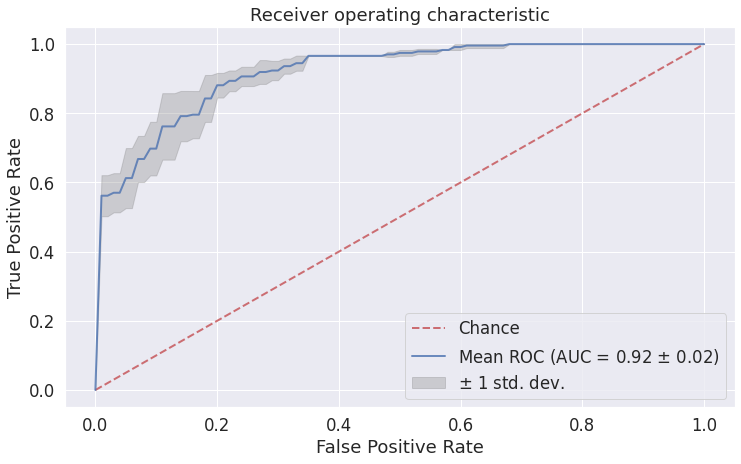

In [45]:
print("Mean Accuracy %0.2f\u00B1%0.2f" % (np.mean(acc), np.std(acc)))
print("Mean Sensitivity %0.2f\u00B1%0.2f" % (np.mean(sen), np.std(sen)))
print("Mean Specificity %0.2f\u00B1%0.2f" % (np.mean(spec), np.std(spec)))
print("Mean PPV %0.2f\u00B1%0.2f" % (np.mean(ppvs), np.std(ppvs)))
print("Mean NPV %0.2f\u00B1%0.2f" % (np.mean(npvs), np.std(npvs)))

fig, ax = plt.subplots(figsize=(12,7))

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)

mean_auc = auc(base_fpr, mean_tprs)
std_auc = np.std(aucs)

ax.plot(
    base_fpr,
    mean_tprs,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

ax.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3,label=r"$\pm$ 1 std. dev.",)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)

sns.set(font_scale=1.5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ax.legend(loc="lower right")
plt.show()
